In [87]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Chapter 2
### Lab
#### Basics

In [3]:
x = np.array([1,3,2,5]) # Creating an array using Numpy 
x

array([1, 3, 2, 5])

In [4]:
y = np.array([2,5,1,2])
x + y # We can perform many different operations on arrays

array([3, 8, 3, 7])

In [5]:
len(x) # Length of the array

4

In [6]:
x = np.array([[1,2,3], [4,5,6], [7,8,9]]) # By passing a list of lists for an array, you create a matrix
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
np.sqrt(x) # We can peform the same operations on the matrices as well

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

In [8]:
x = np.random.randn(50) # random.randn outputs standard normal random variables (mean=0, sd=1)
mean = 50 
sd = 0.1
y = x + np.random.normal(mean, sd, 50) # random.normal allows you to specify the mean and standard deviation for your normal random variables 
np.corrcoef(x,y)[0,1] # corrcoef outputs a matrix of correlations for x with x, x with y, y with x, and y with y

0.9957487727640982

In [9]:
np.random.seed(101) # the seed function allows users to recreate the same randomized outputs for random variables
y = np.random.randn(100)
print('Mean: {:.4} \nStandard Deviation: {:.4} \nVariance: {:.4}'.format(np.mean(y), np.std(y), np.var(y))) 
# mean, std, var are commonly used functions for distributions

Mean: 0.1664 
Standard Deviation: 1.034 
Variance: 1.069


#### Graphics

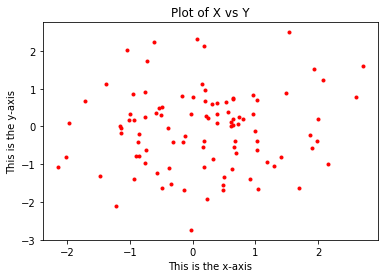

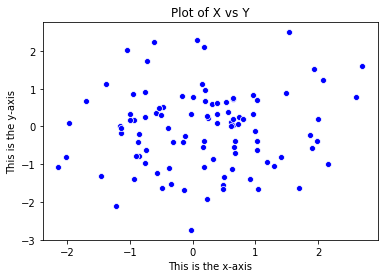

In [10]:
np.random.seed(101)
x, y = np.random.randn(100), np.random.randn(100)
plt.plot(x, y, '.', color='red') # Create a simple scatter plot with matplotlib 
plt.xlabel('This is the x-axis')
plt.ylabel('This is the y-axis')
plt.title('Plot of X vs Y')
plt.show()
plt.savefig('plot.pdf') # Use the savefig function on the figure to save the plot in whichever format you would like

# With Seaborn
np.random.seed(101)
x, y = np.random.randn(100), np.random.randn(100)
ax = sns.scatterplot(x, y, color='b') # The scatterplot function for seaborn creates a simple scatter plot much like the matplotlib version
ax.set(xlabel='This is the x-axis', ylabel='This is the y-axis', title='Plot of X vs Y')
plt.show()
fig = ax.get_figure() # To save a seaborn output you must convert the AxesSubplot into a Figure 
fig.savefig('output.png') 

In [11]:
np.arange(0,10) # The arange function returns evenly spaced values within a given interval

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.arange(0,21,2) # The third input is the step of the function as in the length of one value to the next

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [13]:
np.linspace(0,10,20) # the linspace function returns evenly spaced numbers over a specified interval
# In this case it returns 20 evenly spaced numbers between 0 and 10

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

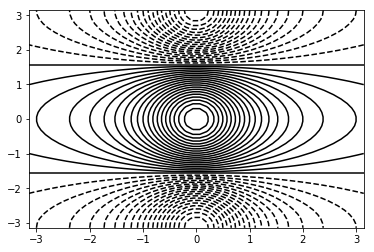

In [14]:
x = np.linspace(-np.pi, np.pi, 50)
y = x
def f(x,y):
    return (np.cos(y))/(1+x**2)
X, Y = np.meshgrid(x, y)
z = f(X,Y)
plt.contour(X, Y, z, 40, colors='black') # You can create more sophisticated with matplotlib (and seaborn) like this contour plot

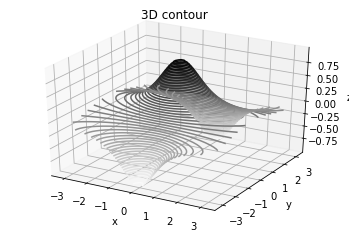

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, z,50, cmap='binary') # Here is an example of a 3D contour plot using matplotlib
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()

#### Indexing Data

In [16]:
A = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
A = np.transpose(A) 
A

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [17]:
A[1,2] # This notation outputs the 1st row, 2nd column of the matrix (remember python indexing starts at 0 while R indexing starts at 1)

10

In [18]:
A[0::2,1::2] # We can slice the matrix to obtain smaller matrices within it

array([[ 5, 13],
       [ 7, 15]])

In [19]:
A[0:3, 1:] # Using 1: means including the 1st column and everything after it

array([[ 5,  9, 13],
       [ 6, 10, 14],
       [ 7, 11, 15]])

In [20]:
A[0:2, :] # Using 0:2 means including the 0th row and all rows until, but NOT including, the 2nd row

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14]])

In [21]:
A[:, 0:2] # In these these last two examples we use the : to include all rows or columns 

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [22]:
A[:2] # Putting the 2 after : means we want all the rows up till, but not including, the 2nd row

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14]])

#### Loading Data

In [23]:
auto = pd.read_csv('Auto.csv') # Use the read_csv function in Pandas to read the Auto dataset

In [24]:
auto.info() # The info method will show give you a lot of useful information on the dataframe like its column names, the amount of observations for each 
# variable, and the type for each variable 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [25]:
auto.drop(auto.loc[auto['horsepower'] == '?'].index, inplace=True) # We remove the missing values in the horsepower column

In [26]:
auto['horsepower'] = pd.to_numeric(auto['horsepower']) # Notice that horsepower is listed as a categorical variable while its contents are numeric

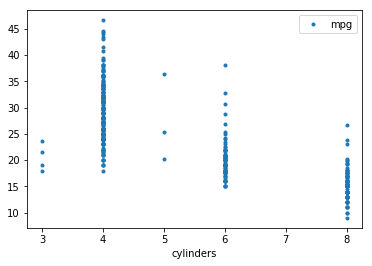

In [27]:
auto.plot(x='cylinders', y='mpg', style='.') 

In [28]:
auto['cylinders'] = auto['cylinders'].astype('category') # We change the type of the cylinders column into a categorical variable 

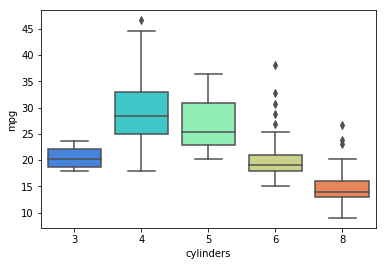

In [29]:
sns.boxplot(x='cylinders', y='mpg', data=auto, palette='rainbow')

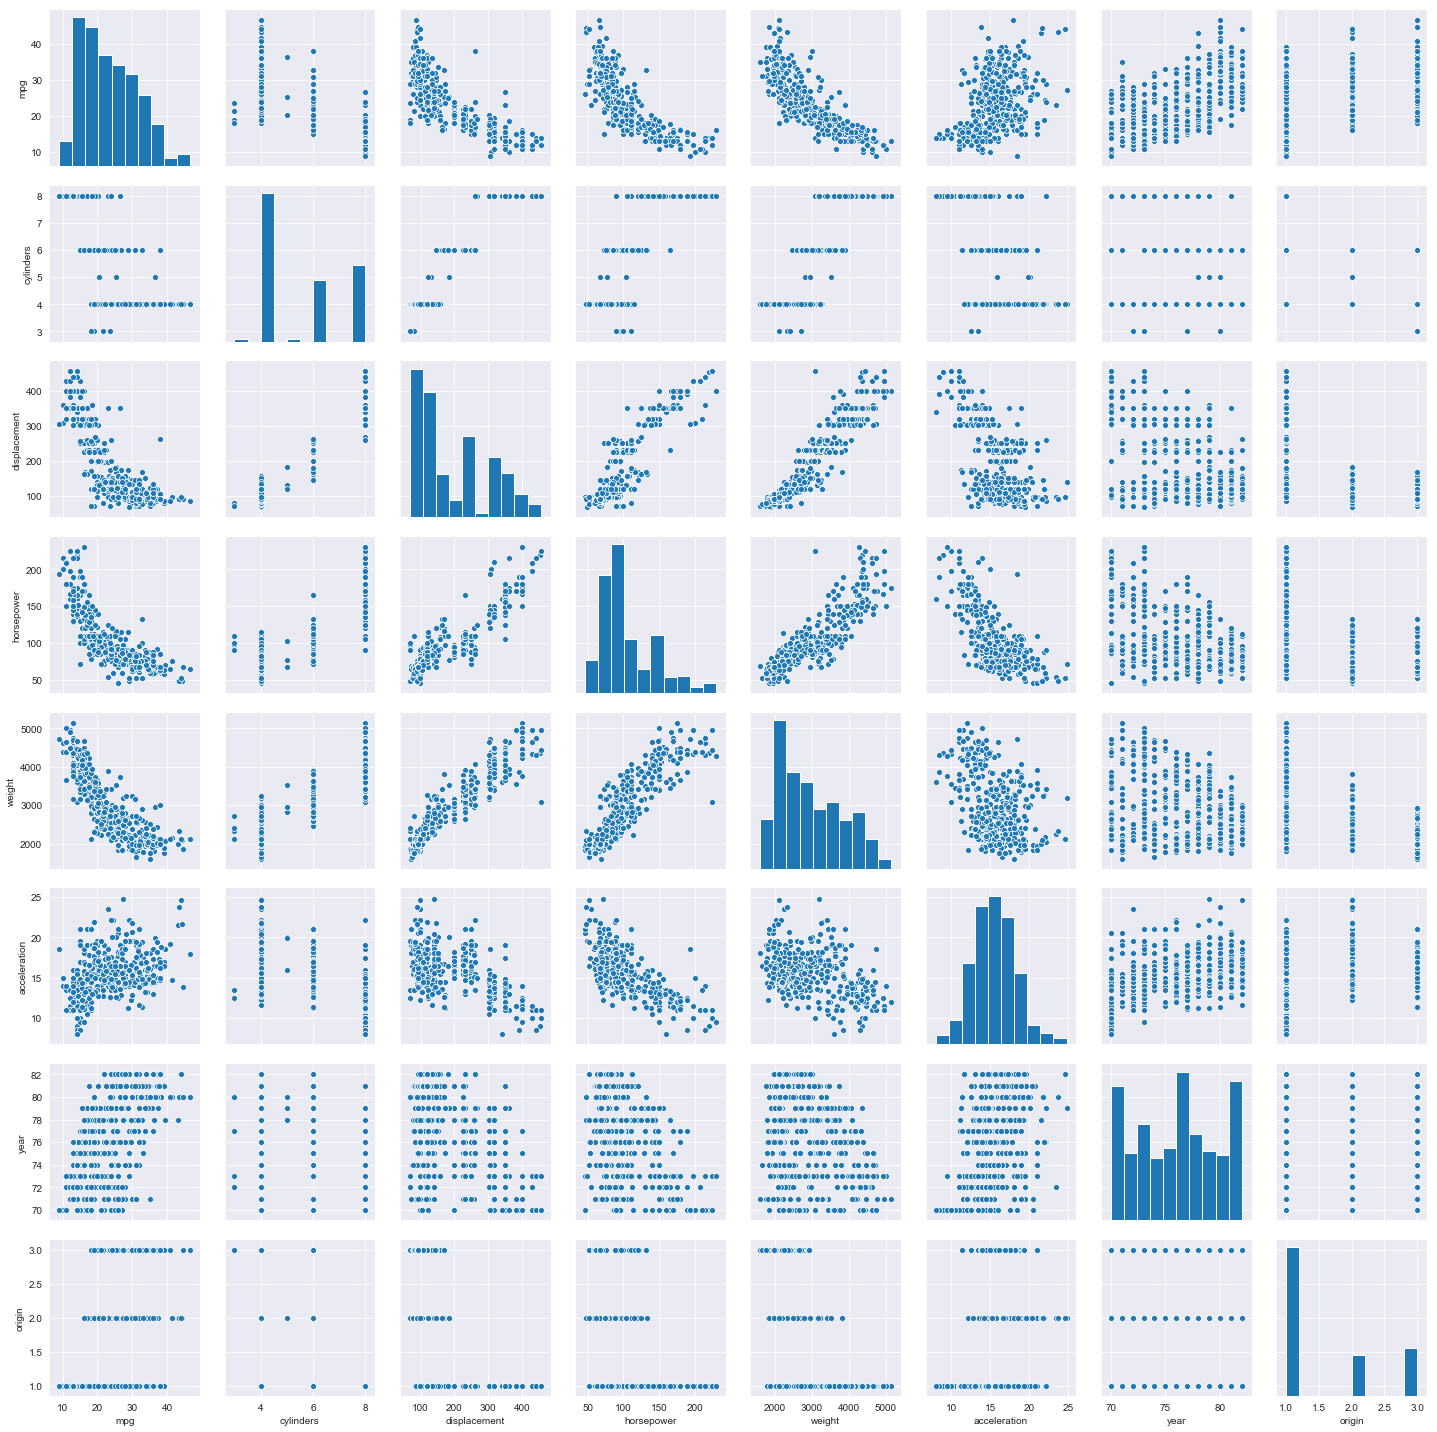

In [30]:
sns.set_style('darkgrid')
sns.pairplot(data=auto) # the pairplot function will show you plots with every numeric variable 

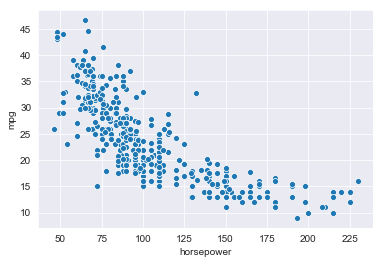

In [31]:
sns.scatterplot(x=auto['horsepower'], y=auto['mpg'])

In [32]:
auto.describe() # the describe method will show each numeric variable's information spread

,mpg,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Applied Exercises
#### 8)

In [33]:
college = pd.read_csv('College.csv')

In [34]:
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [35]:
college.rename(columns={'Unnamed: 0': 'College'}, inplace=True)

In [36]:
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [37]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [38]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   College      777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

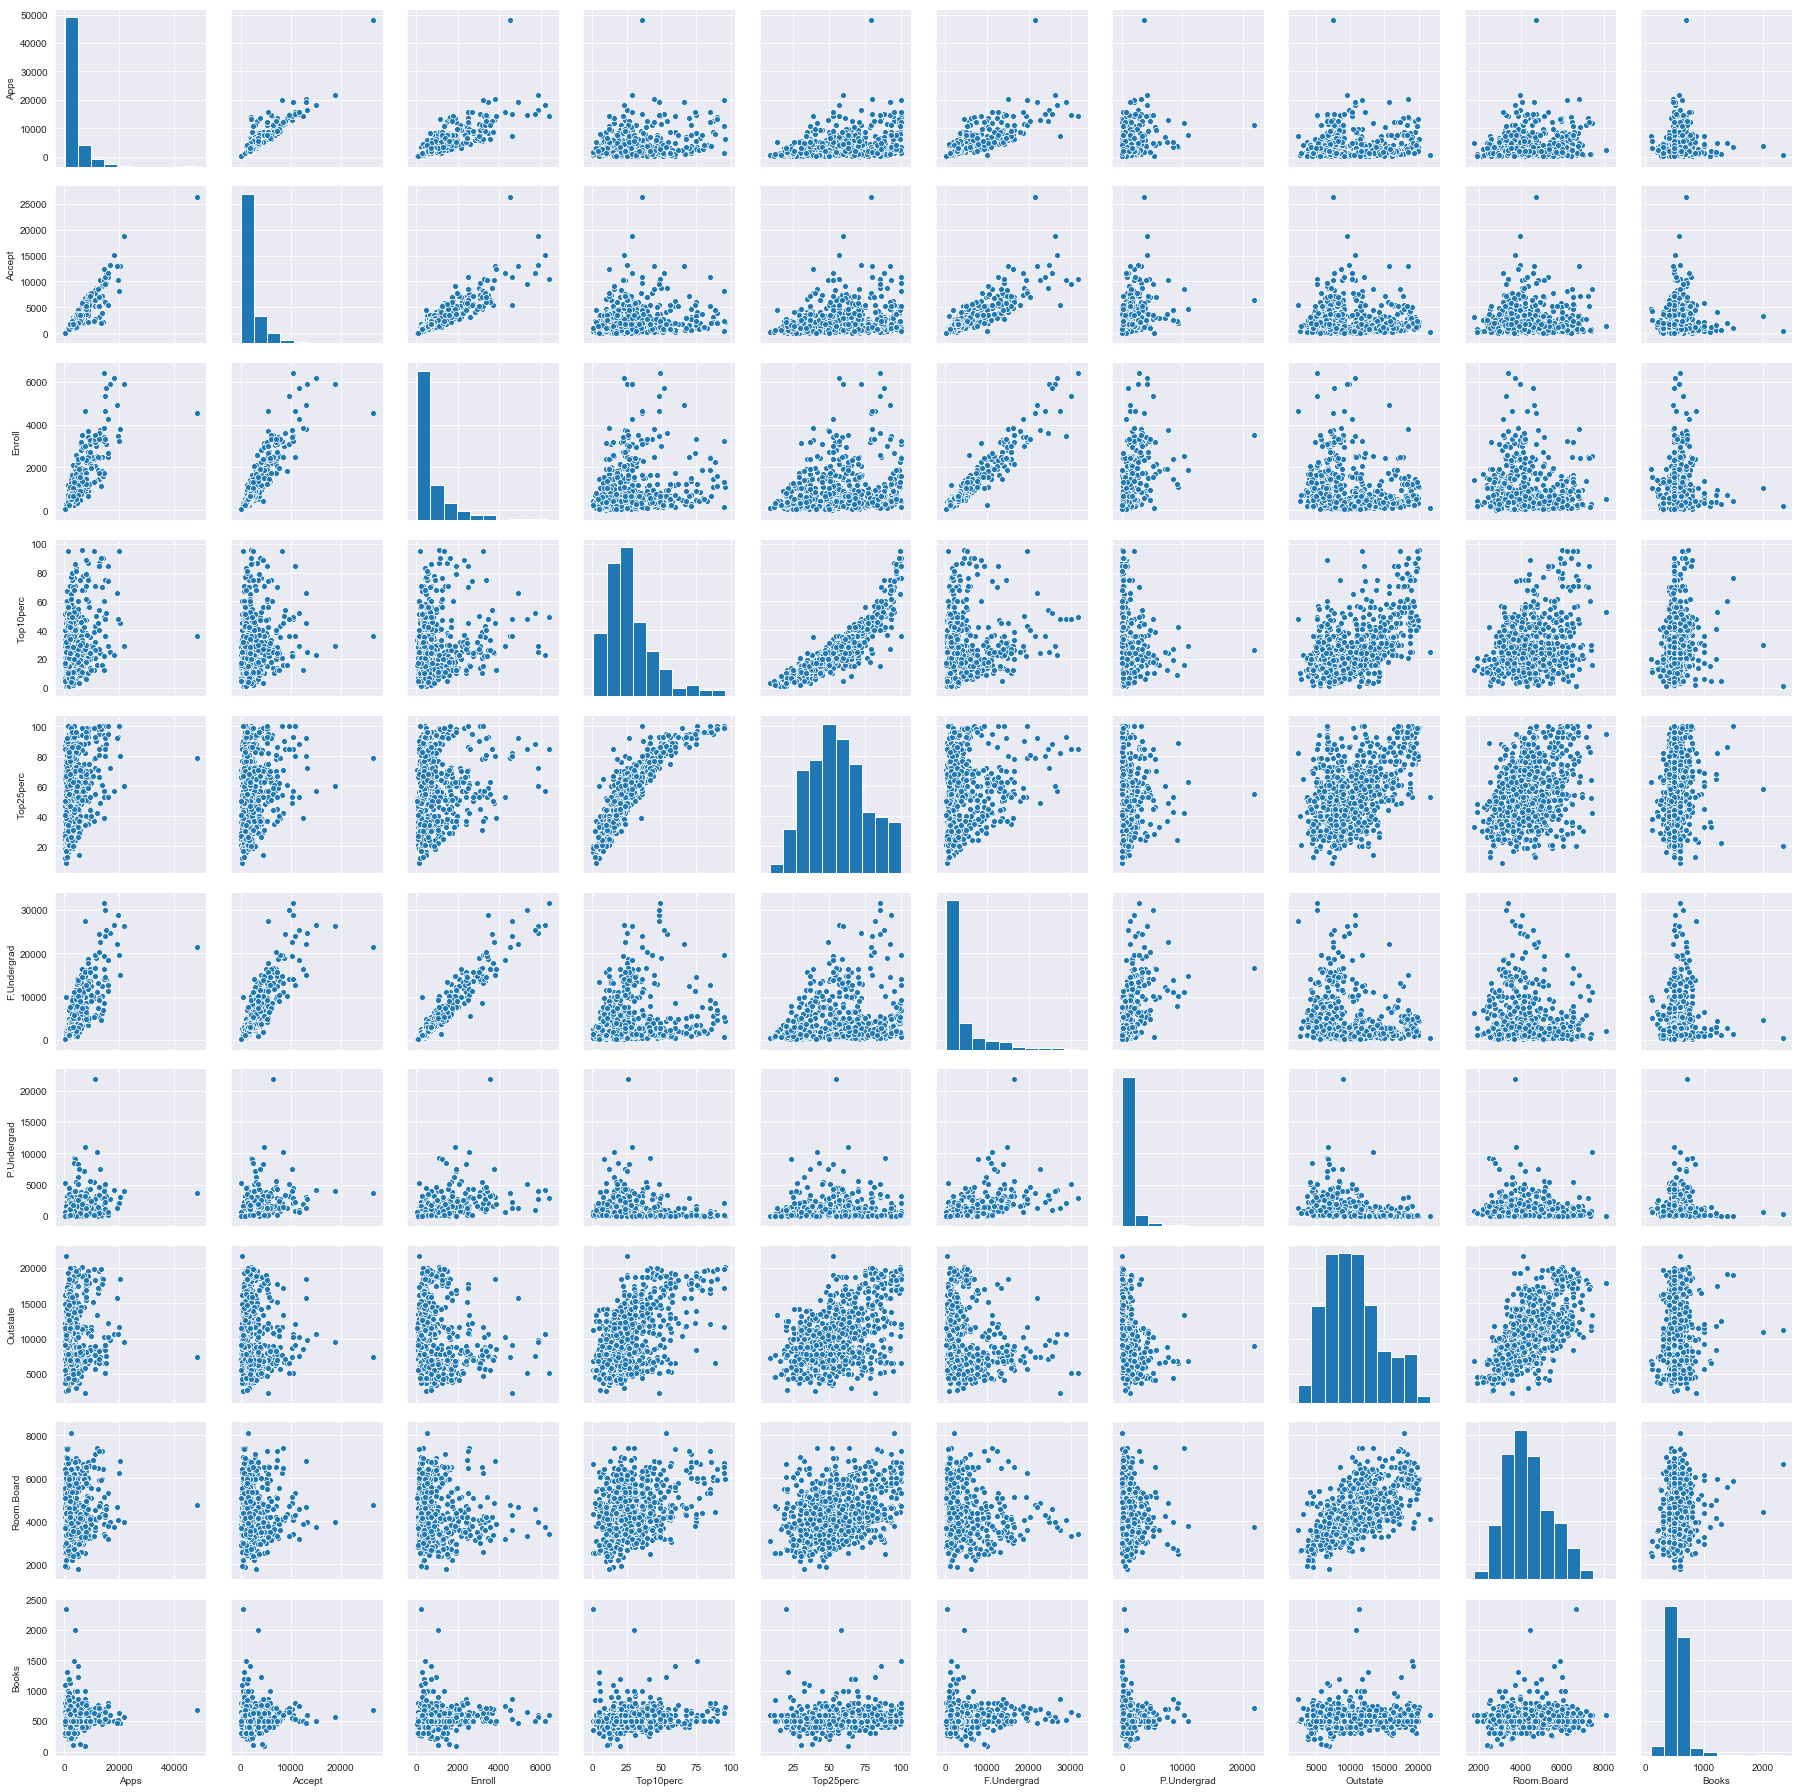

In [39]:
sns.pairplot(college.drop(['Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'], axis=1))

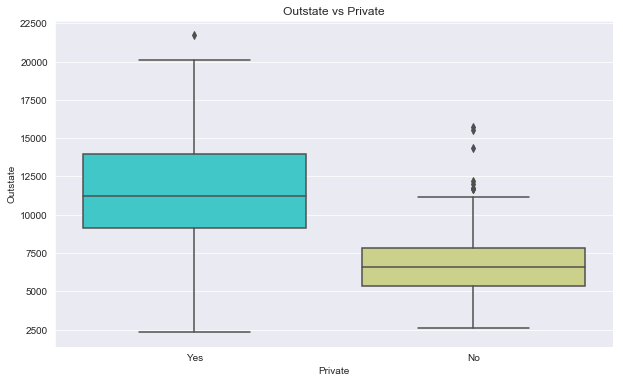

In [40]:
f, ax = plt.subplots(figsize=(10,6))
ax.set_title('Outstate vs Private')

sns.boxplot(x='Private', y='Outstate', data=college, palette='rainbow', ax=ax)

In [41]:
def elite(df):
    if df['Top10perc'] > 50:
        return 'Yes'
    else:
        return 'No'

college['Elite'] = college.apply(elite, axis=1)
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

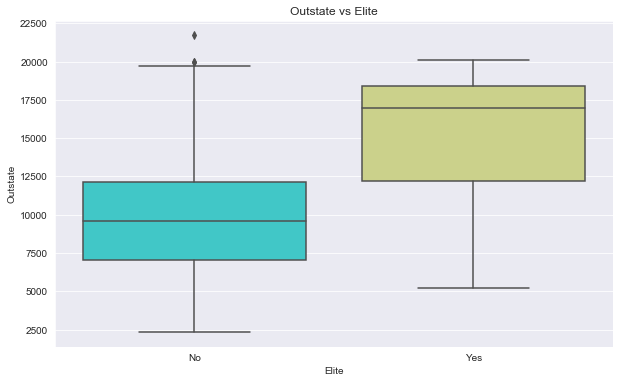

In [42]:
f, ax = plt.subplots(figsize=(10,6))
ax.set_title('Outstate vs Elite')

sns.boxplot(x='Elite', y='Outstate', data=college, palette='rainbow', ax=ax)

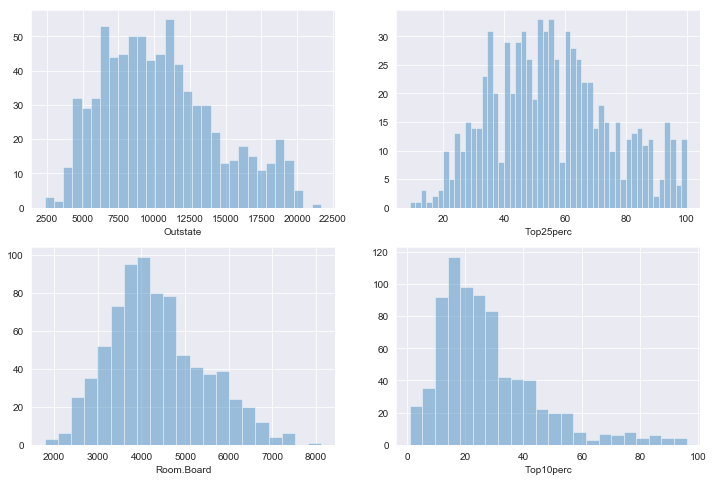

In [43]:
f, ax = plt.subplots(2,2,figsize=(12,8))

sns.distplot(college['Outstate'], ax=ax[0,0], kde=False, bins=30)
sns.distplot(college['Top25perc'], ax=ax[0,1], kde=False, bins=50)
sns.distplot(college['Room.Board'], ax=ax[1,0], kde=False)
sns.distplot(college['Top10perc'], ax=ax[1,1], kde=False)

In [55]:
college['T.Undergrad'] = college['F.Undergrad'] + college['P.Undergrad']

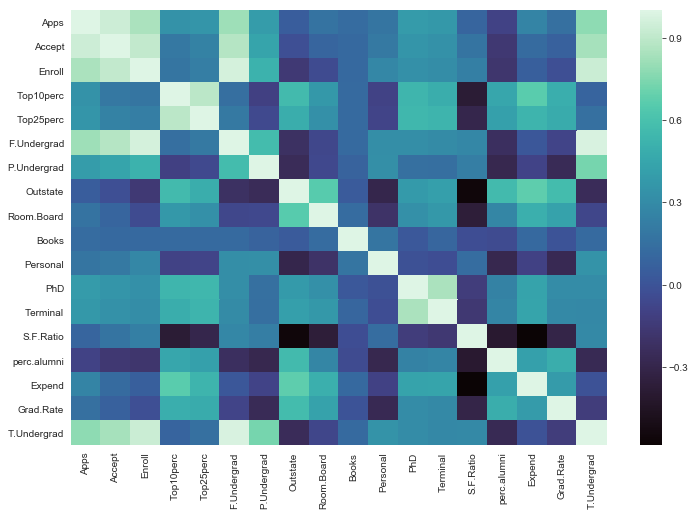

In [62]:
f, ax = plt.subplots(figsize=(12,8))

sns.heatmap(college.corr(), cmap='mako', ax=ax)
# From the heatmap we can see that there aren't many important correlations in this dataset

#### 9)

In [8]:
auto = pd.read_csv('Auto.csv')

In [23]:
auto['cylinders'] = auto['cylinders'].astype('category') 

In [24]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    int64   
 7   origin        392 non-null    int64   
 8   name          392 non-null    object  
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 28.1+ KB


In [18]:
'?' in auto['horsepower'].unique()

True

In [19]:
for c in auto.columns:
    if '?' in auto[c].unique():
        auto.drop(auto.loc[auto[c] == '?'].index, inplace=True)

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [20]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

In [28]:
total = auto.isnull().sum().sort_values(ascending=False)
percent = (auto.isnull().sum()/auto.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
name,0,0.0
origin,0,0.0
year,0,0.0
acceleration,0,0.0
weight,0,0.0
horsepower,0,0.0
displacement,0,0.0
cylinders,0,0.0
mpg,0,0.0


In [74]:
min_values = auto.drop('name', axis=1).min()
max_values = auto.drop('name', axis=1).max()
range_data = pd.concat([min_values, max_values], axis=1, keys=['Min', 'Max'])
range_data

,Min,Max
mpg,9.0,46.6
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0
origin,1.0,3.0


In [79]:
mean_values = auto.drop('name', axis=1).mean()
std_values = auto.drop('name', axis=1).std()
mean_std = pd.concat([mean_values, std_values], axis=1, keys=['Mean', 'Standard Deviation'])
mean_std

,Mean,Standard Deviation
mpg,23.445918,7.805007
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737
origin,1.576531,0.805518


In [82]:
sliced_auto = auto.drop(auto.index[9:85])
min_values = sliced_auto.drop('name', axis=1).min()
max_values = sliced_auto.drop('name', axis=1).max()
mean_values = sliced_auto.drop('name', axis=1).mean()
std_values = sliced_auto.drop('name', axis=1).std()
table = pd.concat([min_values, max_values, mean_values, std_values], axis=1, keys=['Min', 'Max','Mean', 'Standard Deviation'])
table

,Min,Max,Mean,Standard Deviation
mpg,11.0,46.6,24.404430,7.867283
displacement,68.0,455.0,187.240506,99.678367
horsepower,46.0,230.0,100.721519,35.708853
weight,1649.0,4997.0,2935.971519,811.300208
acceleration,8.5,24.8,15.726899,2.693721
year,70.0,82.0,77.145570,3.106217
origin,1.0,3.0,1.601266,0.819910


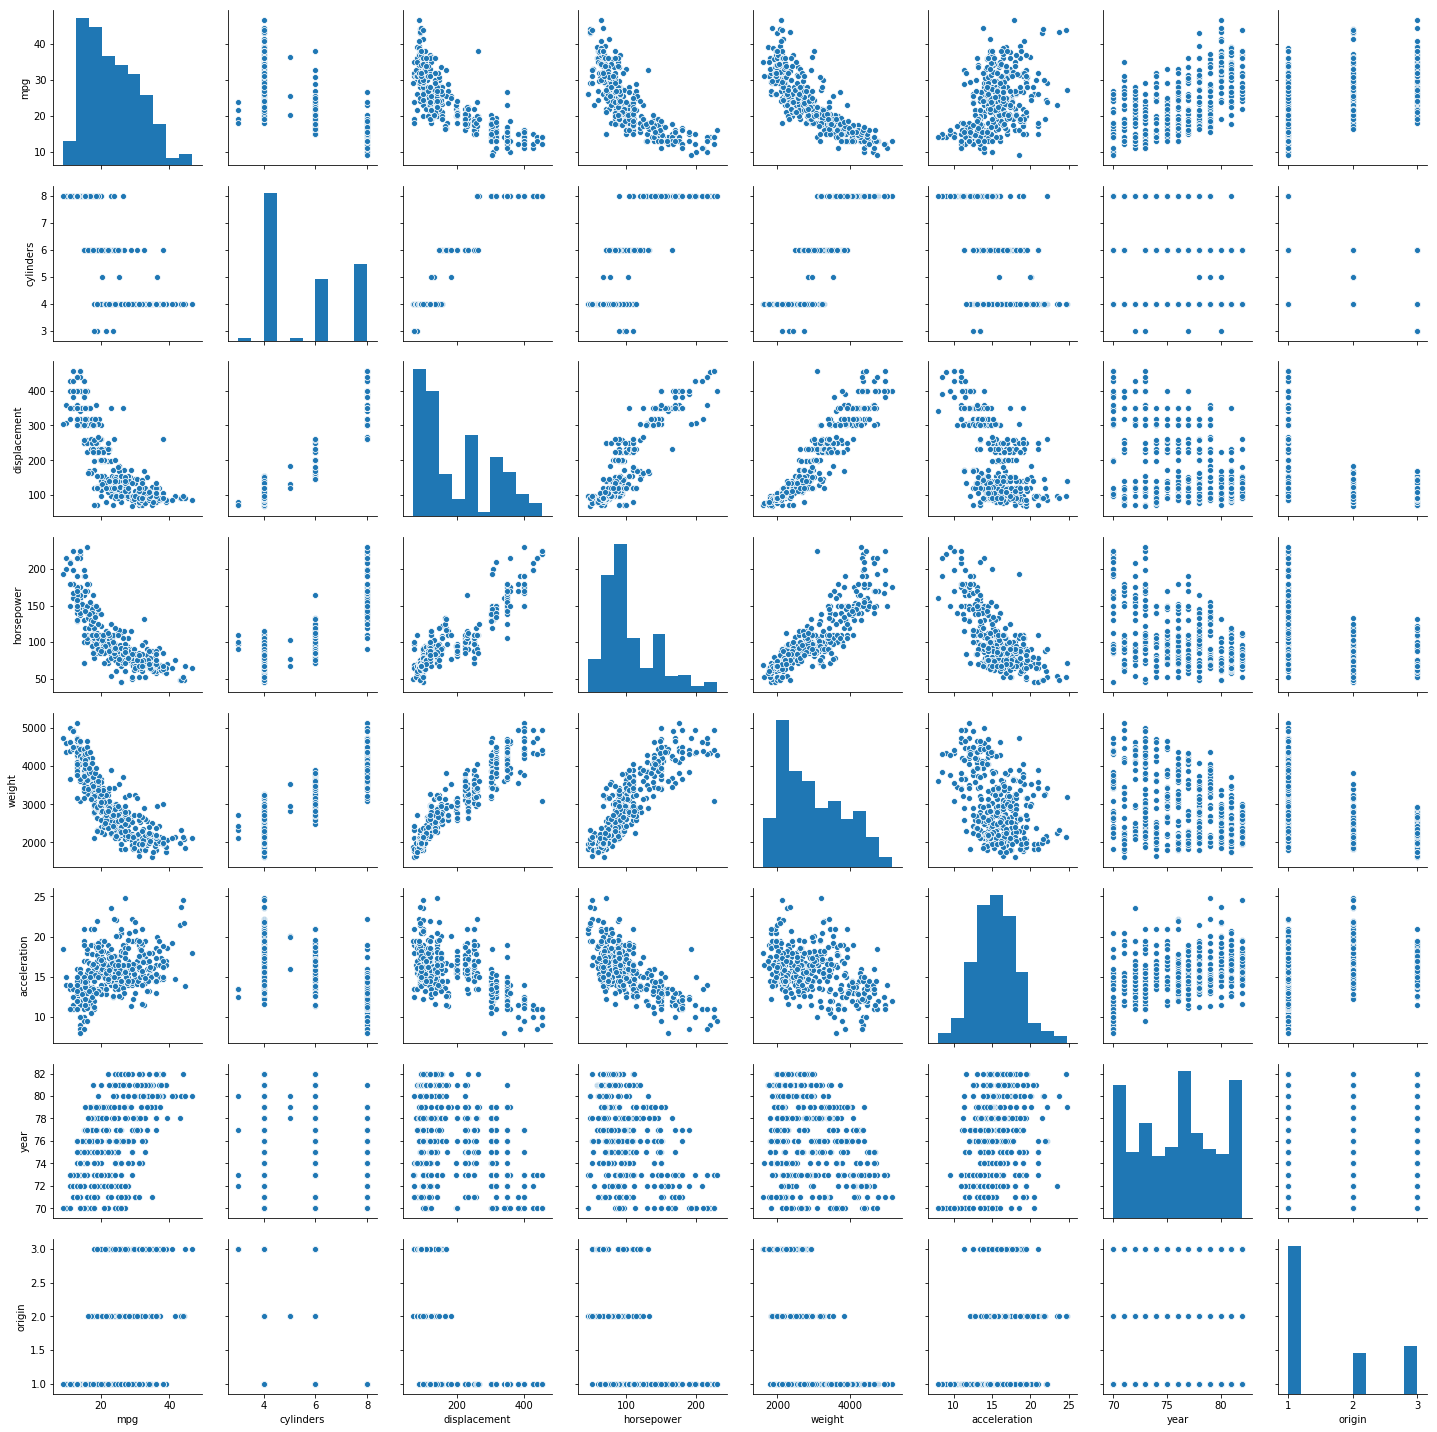

In [84]:
sns.pairplot(auto)

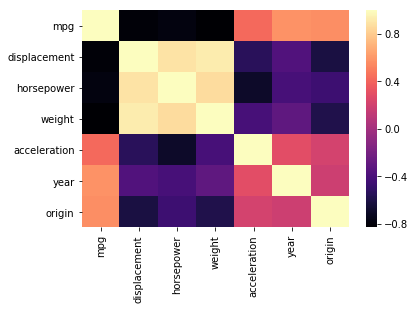

In [83]:
sns.heatmap(auto.corr(), cmap='magma') # We can see that mpg and the trio of displacement, horsepower, and weight have a strong negative correlation
# And that trio are very correlated to eachother which means you may only need one of them to be able to predict mpg in a model (to avoid colinearity)

#### 10)

In [88]:
boston = datasets.load_boston()

In [100]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['MEDV'] = boston.target

In [101]:
bos.info() # 14 columns of data details of which you can review here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
# 506 rows 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


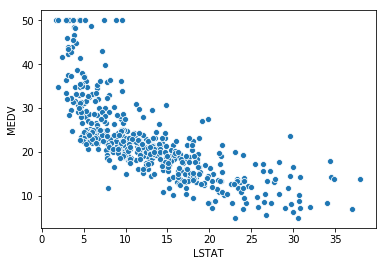

In [105]:
sns.scatterplot(x=bos['LSTAT'], y=bos['MEDV'])

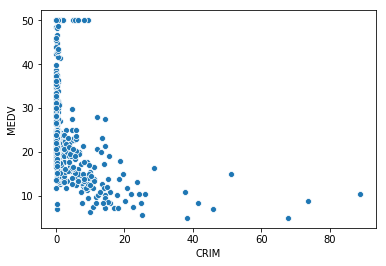

In [108]:
sns.scatterplot(x=bos['CRIM'], y=bos['MEDV'])

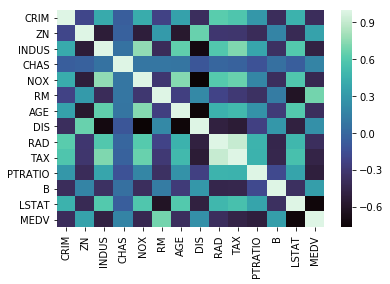

In [103]:
sns.heatmap(bos.corr(), cmap='mako')
# The variables that are associated with per capita crime rate (CRIM) are RAD and TAX and they are both moderately postively correlated to CRIM 

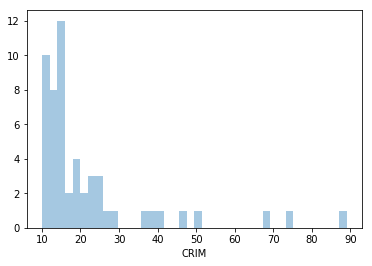

In [130]:
sns.distplot(bos[bos['CRIM'] > 10.0]['CRIM'], kde=False, bins=40) # From this histogram we see that there are 3 suburbs with a crim rate in the 60-90 range

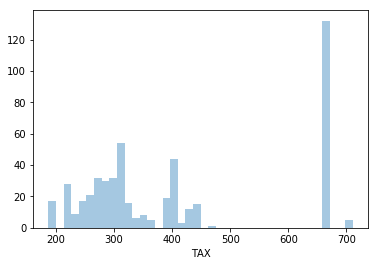

In [131]:
sns.distplot(bos['TAX'], kde=False, bins=40) # One very high point sitting just above 700, but lots of datapoints sitting in the 650-700 range

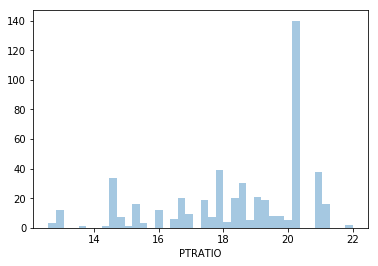

In [132]:
sns.distplot(bos['PTRATIO'], kde=False, bins=40) # The max value is sitting by itself but otherwise there are a lot points nearby, so nothing unsually high

In [133]:
bos['CHAS'].value_counts() # Only 35 suburbs bound the the Charles River 

0.0    471
1.0     35
Name: CHAS, dtype: int64